<a href="https://colab.research.google.com/github/AkP2809/Intership-Studio-ML-Project/blob/master/Armaan_Khan_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Importing the required libraries for EDA**

Imported required libraries such as numpy, pandas to read dataframe, matplotlib to show the information in graphs, seaborn

In [228]:
import pandas as pd          
import numpy as np                 
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [229]:
dataset=pd.read_csv("Data.csv")   #Reading the data
dataset.head()                                #head() returns first 5 lines of data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [230]:
dataset.tail()            #reyurns last 5 lines of data

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


In [231]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [232]:
dataset.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


#**Removing Negative values** 

In [233]:
#There are 52 negative values found
dataset[dataset["Experience"]< 0]["Experience"].count()

52

In [234]:
#Clean the negarive variables
datasetExp=dataset.loc[dataset['Experience']> 0]
negExp= dataset.Experience < 0
column_name='Experience'
my_list=dataset.loc[negExp]['ID'].tolist()

In [235]:
negExp.value_counts()

False    4948
True       52
Name: Experience, dtype: int64

In [236]:
#Replace all negative values by median
#Do not use mean as they are sensative for outliers
for id in my_list:
  age = dataset.loc[np.where(dataset['ID'] == id)]["Age"].tolist()[0]
  education = dataset.loc[np.where(dataset["ID"] == id)]["Education"].tolist()[0]
  dataset_filtered = datasetExp[(datasetExp.Age == age) & (datasetExp.Education == education)]
  exp = dataset_filtered["Experience"].median()
  dataset.loc[dataset.loc[np.where(dataset['ID'] == id)].index, "Experience"] = exp

In [237]:
#As a result there are 0 negative values
dataset[dataset["Experience"]< 0]["Experience"].count()

0

##Information on the features or attributes
The attributes can be divided accordingly :

The variable ID does not add any interesting information. There is no 
association between a person's customer ID and loan, also it does not provide any general conclusion for future potential loan customers. We can neglect this information for our model prediction.

The binary category have five variables as below:

Personal Loan - Did this customer accept the personal loan offered in the last campaign? This is our target variable
Securities Account - Does the customer have a securities account with the bank?
CD Account - Does the customer have a certificate of deposit (CD) account with the bank?
Online - Does the customer use internet banking facilities?
Credit Card - Does the customer use a credit card issued by UniversalBank?

Interval variables are as below:

Age - Age of the customer
Experience - Years of experience
Income - Annual income in dollars
CCAvg - Average credit card spending
Mortage - Value of House Mortgage

Ordinal Categorical Variables are:

Family - Family size of the customer

Education - education level of the customer

The nominal variable is :

ID
Zip Code

In [238]:
dataset.shape

(5000, 14)

In [239]:
dataset.columns       #Returns name of columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [240]:
dataset.isnull()       #Returns bool value for each value whether data is null or not

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [241]:
# No columns have null value in data
dataset.isnull().sum()

ID                     0
Age                    0
Experience            29
Income                 0
ZIP Code               0
Family                 0
CCAvg                  0
Education              0
Mortgage               0
Personal Loan          0
Securities Account     0
CD Account             0
Online                 0
CreditCard             0
dtype: int64

In [242]:
#Eye balling the data
dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,4971.0,20.243211,11.359189,0.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937913,1.747666,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


In [243]:
# number of unique in each column
dataset.nunique()

ID                    5000
Age                     45
Experience              44
Income                 162
ZIP Code               467
Family                   4
CCAvg                  108
Education                3
Mortgage               347
Personal Loan            2
Securities Account       2
CD Account               2
Online                   2
CreditCard               2
dtype: int64

##Value counts 

In [244]:
# value count for all categorical data
dataset.Family.value_counts()

1    1472
2    1296
4    1222
3    1010
Name: Family, dtype: int64

In [245]:
dataset.Education.value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

In [246]:
dataset['Securities Account'].value_counts()

0    4478
1     522
Name: Securities Account, dtype: int64

In [247]:
dataset['CD Account'].value_counts()

0    4698
1     302
Name: CD Account, dtype: int64

In [248]:
dataset['CreditCard'].value_counts()

0    3530
1    1470
Name: CreditCard, dtype: int64

In [249]:
dataset.Online.value_counts()

1    2984
0    2016
Name: Online, dtype: int64

##Droping columns

In [250]:
dataset.Experience

0        1.0
1       19.0
2       15.0
3        9.0
4        8.0
        ... 
4995     3.0
4996     4.0
4997    39.0
4998    40.0
4999     4.0
Name: Experience, Length: 5000, dtype: float64

In [251]:
experience = dataset['Experience']
age = dataset['Age']
correlation = experience.corr(age)
correlation

0.9941593220099937

In [252]:
dataset = dataset.drop(['ID'],axis=1)     #Removing unneccessary columns from the data
dataset.head()

,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1.0,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,19.0,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,15.0,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,9.0,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,8.0,45,91330,4,1.0,2,0,0,0,0,0,1


In [253]:
duplicate_rows_dataset = dataset[dataset.duplicated()]
print("Number of duplicate rows ", duplicate_rows_dataset)

Number of duplicate rows  Empty DataFrame
Columns: [Age, Experience, Income, ZIP Code, Family, CCAvg, Education, Mortgage, Personal Loan, Securities Account, CD Account, Online, CreditCard]
Index: []


In [254]:
dataset[dataset["Mortgage"] == 0]["Mortgage"].count()   #Number of people with zero mortgage

3462

In [255]:
dataset[dataset["CCAvg"] == 0]["CCAvg"].count()        #Number of people with zero credit card spending per month

106

#**Study of data distribution in each attribute and target variable**

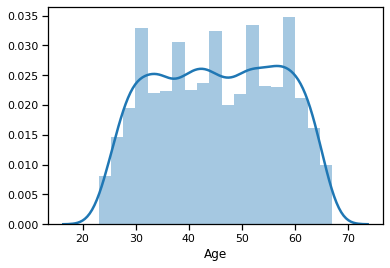

In [256]:
## Univeriate Analysis
## Age seems to have symmetric distribution
sns.distplot(dataset.Age)

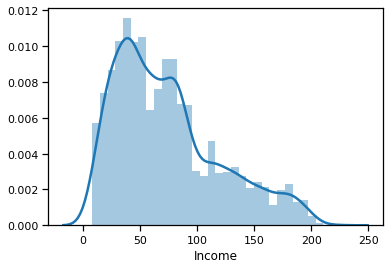

In [257]:
## Insome has right skewed distribution
sns.distplot(dataset.Income)

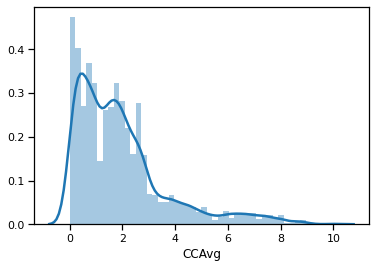

In [258]:
##Credit Card Average is right skewed distribution
sns.distplot(dataset.CCAvg)

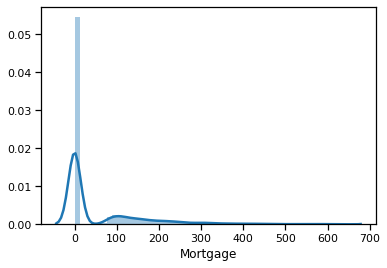

In [259]:
## Mortgage column seems highly skewed
sns.distplot(dataset.Mortgage)

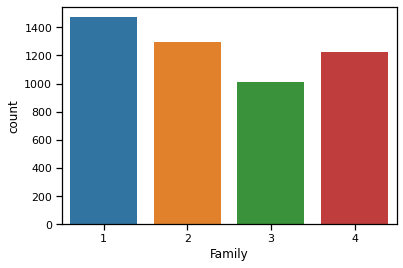

In [260]:
sns.countplot(dataset.Family)

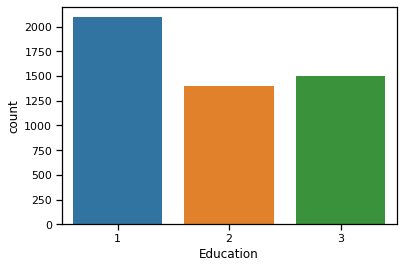

In [261]:
sns.countplot(dataset.Education)

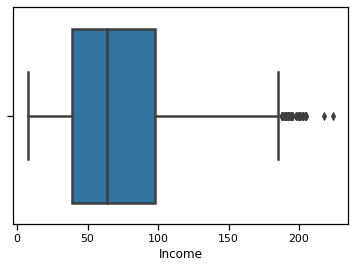

In [262]:
sns.boxplot(x=dataset['Income'])

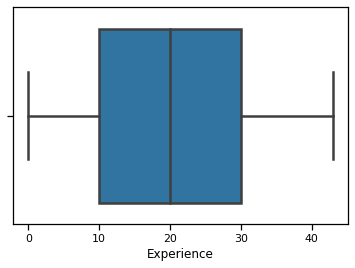

In [263]:
sns.boxplot(x=dataset['Experience'])

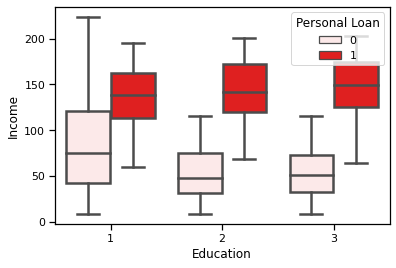

In [264]:
sns.boxplot(x='Education',y='Income',hue='Personal Loan',data=dataset,color='red')

**Obervation**

It seems the customers whose education level is 1 is having more income. However customers who has taken the personal loan have the same income levels



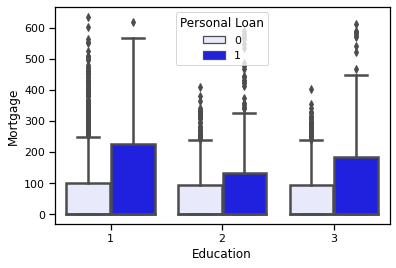

In [265]:
sns.boxplot(x="Education", y='Mortgage', hue="Personal Loan", data=dataset,color='blue')

**Inference :**

From the above chart it seems that customer who do not have personal loan and customer who has personal loan have high mortgage

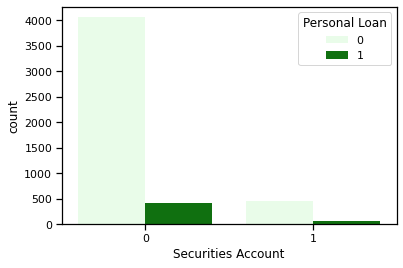

In [266]:
sns.countplot(x="Securities Account", data=dataset,hue="Personal Loan",color='green')

**Observation :**

 Majority of customers who does not have loan have securities account

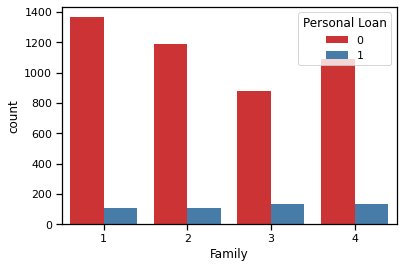

In [267]:
sns.countplot(x='Family',data=dataset,hue='Personal Loan',palette='Set1')

**Observation:**

 Family size does not have any impact in personal loan. But it seems families with size of 3 are more likely to take loan. When considering future campaign this might be good association.

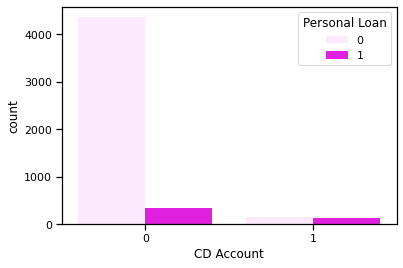

In [268]:
sns.countplot(x='CD Account',data=dataset,hue='Personal Loan',color='magenta')

**Observation:**

 Customers who does not have CD account , does not have loan as well. This seems to be majority. But almost all customers who has CD account has loan as well

Text(0, 0.5, 'Age')

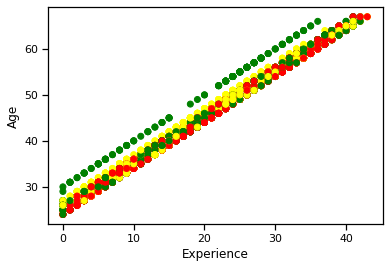

In [269]:
fig, ax = plt.subplots()
colors = {1:'red',2:'yellow',3:'green'}
ax.scatter(dataset['Experience'],dataset['Age'],c=dataset['Education'].apply(lambda x:colors[x]))
plt.xlabel('Experience')
plt.ylabel('Age')

**Observation:**

The above plot show with experience and age have a positive correlation. As experience increase age also increases. Also the colors show the education level. There is gap in the mid forties of age and also more people in the under graduate level

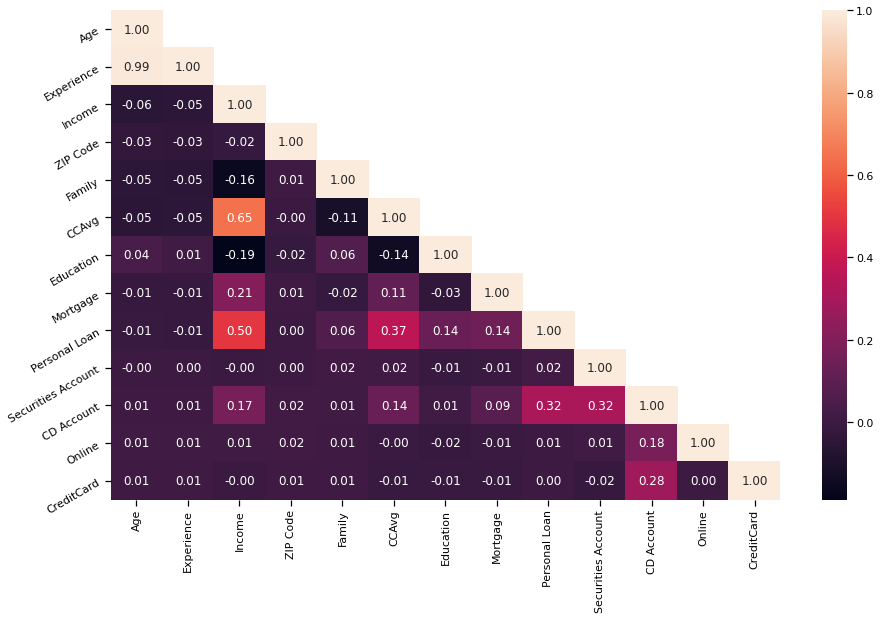

In [270]:
corr = dataset.corr()
sns.set_context("notebook", font_scale=1.0, rc={"lines.linewidth": 2.5})
plt.figure(figsize=(15,9))
# create a mask so we only see the correlation values once
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask, 1)] = True
a = sns.heatmap(corr,mask=mask, annot=True, fmt='.2f')
rotx = a.set_xticklabels(a.get_xticklabels(), rotation=90)
roty = a.set_yticklabels(a.get_yticklabels(), rotation=30)

**Observation:**

Income and CCAvg is moderately correlated.
Age and Experience is highly correlated

In [271]:
Q1 = dataset.quantile(0.25)
Q3 = dataset.quantile(0.75)
IQR = Q3-Q1
print(IQR)

Age                     20.0
Experience              20.0
Income                  59.0
ZIP Code              2697.0
Family                   2.0
CCAvg                    1.8
Education                2.0
Mortgage               101.0
Personal Loan            0.0
Securities Account       0.0
CD Account               0.0
Online                   1.0
CreditCard               1.0
dtype: float64


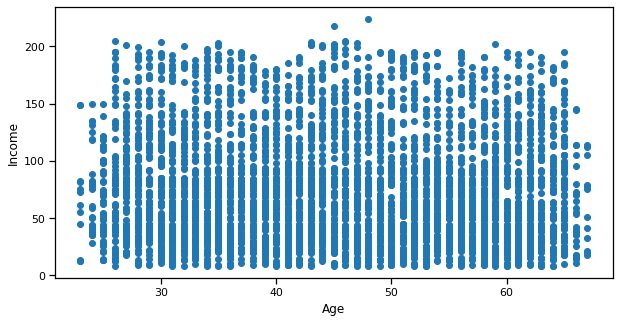

In [272]:
fig, ax = plt.subplots(figsize = (10,5))
ax.scatter(dataset['Age'],dataset['Income'])
ax.set_xlabel('Age')
ax.set_ylabel('Income')
plt.show()

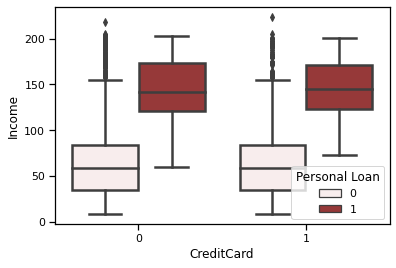

In [273]:
sns.boxplot(x='CreditCard',y='Income',hue='Personal Loan',data=dataset,color='brown')

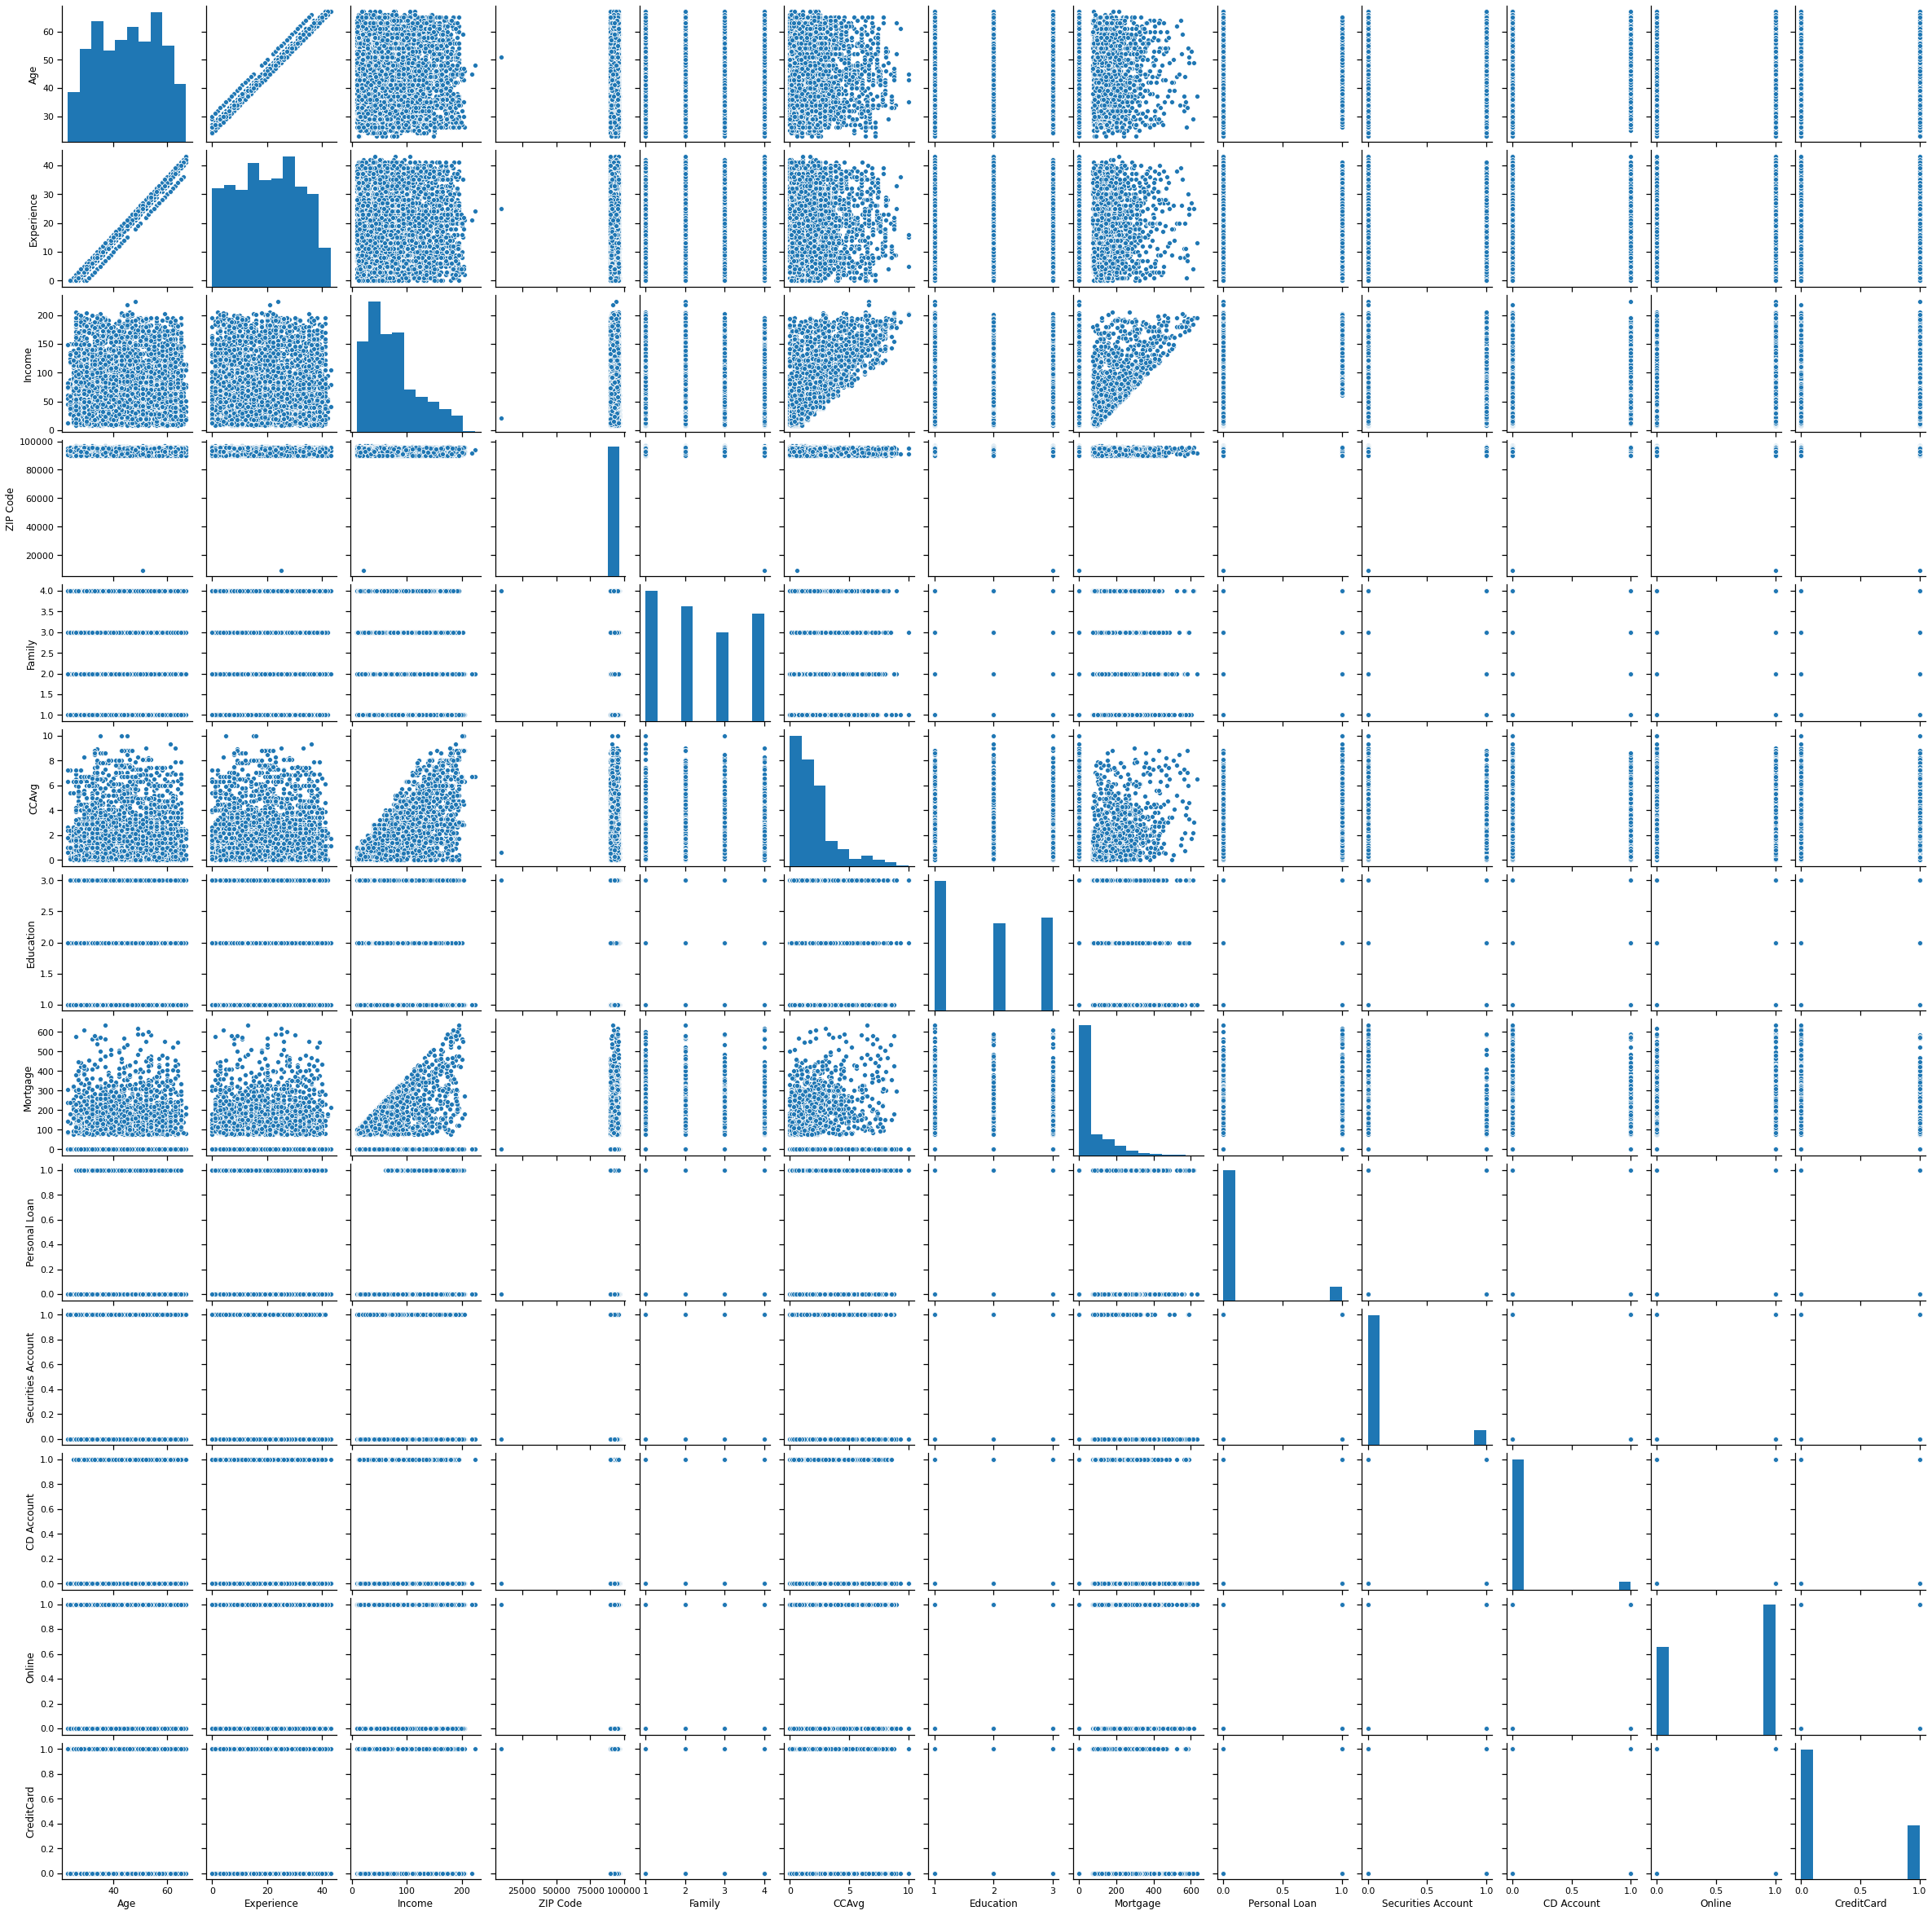

In [274]:
sns.pairplot(dataset)

Observation : From the above pair plot we can infer the association among the attributes and target column as follows:

'Age' column is normally distributed. Here can see that the mean and midean is almost same which we have also seen in the transpose matrics. Most of the customers age is between 25 to 65 years.

'Experience' is also mormally distributed. Here also mean is amost equal to midean. 

'Experience' and 'Age' are stong possitive associasion.

'Income' is positively skewed and it will also have the outlier
We dont see any relationship with the ZIP Code and other variables.

Family and Education has low association with the 'Personal Loan'.

The disribution of CCAvg is also a possotively skewed variable. Majority of the customers average monthly spending is between 1k to 9k.

'Mortgage' is also positively skewed. Majority of the individuals have a mortgage of less than 40K.


#**Transformations of feature variables**

In [275]:
data_X=dataset[['Age','Income','CCAvg','Education','Mortgage','Securities Account']]
data_Y=dataset['Personal Loan'].values

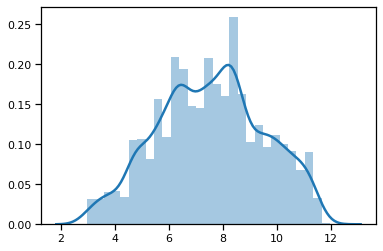

In [276]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = "yeo-johnson",standardize =False)
pt.fit(data_X["Income"].values.reshape(-1,1))
temp = pt.transform(data_X["Income"].values.reshape(-1,1))
sns.distplot(temp);

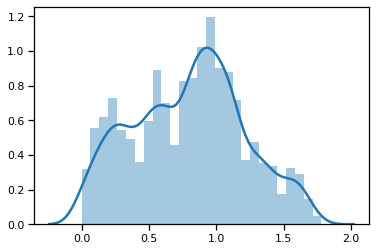

In [277]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method = "yeo-johnson",standardize =False)
pt.fit(data_X["CCAvg"].values.reshape(-1,1))
temp = pt.transform(data_X["CCAvg"].values.reshape(-1,1))
sns.distplot(temp);

In [278]:
loan_counts = pd.DataFrame(dataset["Personal Loan"].value_counts()).reset_index()
loan_counts.columns =["Labels","Personal Loan"]
loan_counts

,Labels,Personal Loan
0,0,4520
1,1,480


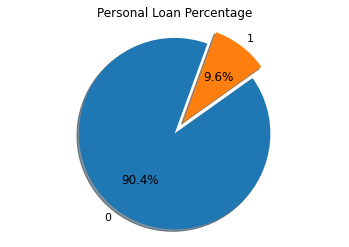

In [279]:
fig1, ax1 = plt.subplots()
explode = (0, 0.15)
ax1.pie(loan_counts["Personal Loan"], explode=explode, labels=loan_counts["Labels"], autopct='%1.1f%%',
        shadow=True, startangle=70)
ax1.axis('equal')  
plt.title("Personal Loan Percentage")
plt.show()

Comment: Out of 5000 data points, 4520 are labeled as 0 and 480 as 1. Percentage of customers who took loan is significantlly greater than customers who did not take loan.

In [280]:
data_X["Mortgage_Int"] = pd.cut(data_X["Mortgage"],
                                bins=[0,100,200,300,400,500,600,700],
                                labels=[0,1,2,3,4,5,6],
                                include_lowest=True)
data_X.drop("Mortgage", axis = 1, inplace=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [281]:
data_X.head()

,Age,Income,CCAvg,Education,Securities Account,Mortgage_Int
0,25,49,1.6,1,1,0
1,45,34,1.5,1,1,0
2,39,11,1.0,1,0,0
3,35,100,2.7,2,0,0
4,35,45,1.0,2,0,0


In [282]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler()
x = sc_x.fit_transform(data_X)
y = sc_y.fit_transform(data_Y.reshape(-1,1))

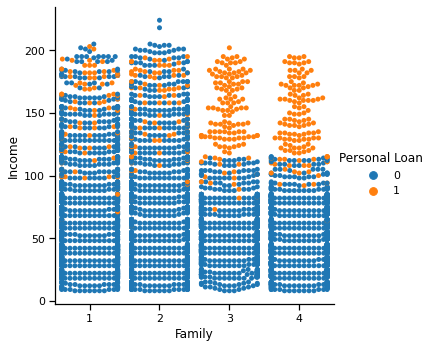

In [283]:
sns.catplot(x='Family', y='Income', hue='Personal Loan', data = dataset, kind='swarm')

Observation: Customers who have family size 3 or greater with higher income between 100k to 200k are more likely to take loan.

##**Train and test split**

In [284]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(data_X,data_Y,test_size = 0.3,  random_state = 0)


In [285]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(3500, 6) (1500, 6) (3500,) (1500,)


In [286]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [287]:
print("Train Accuracy :", model.score(x_train,y_train))
print("Test Accuracy :", model.score(x_test,y_test))

Train Accuracy : 0.9394285714285714
Test Accuracy : 0.95


In [288]:
y_predict=model.predict(x_test)
y_predict


array([0, 0, 0, ..., 0, 0, 0])

In [289]:
from sklearn.metrics import confusion_matrix
cm= confusion_matrix(y_test,y_predict)
cm

array([[1352,   20],
       [  55,   73]])

Logistic Regression gave us 93.9% accuracy  on train and 95% on test data. Confusion matrix tells us that our modelcorrectly predicted 1352
no_sub(0) ,73 subs(1) with 1425 correct prediction in total and we had 75 incorrect prediction in total.

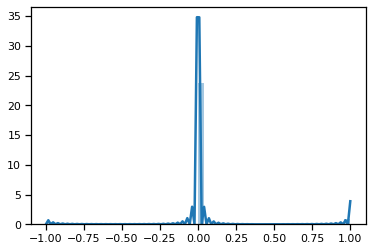

In [290]:
sns.distplot((y_test - y_predict),bins = 50)

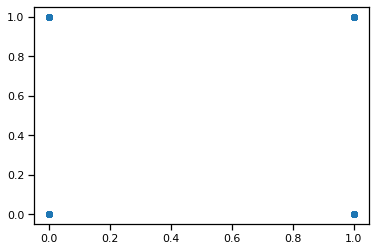

In [291]:
plt.scatter(y_test,y_predict)

In [292]:
from sklearn import metrics
print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test,y_predict))
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(y_test,y_predict)))
print('R2 Score', metrics.r2_score(y_test,y_predict))

Mean Absolute Error:  0.05
Root Mean Squared Error 0.22360679774997896
R2 Score 0.3593977769679302


In [293]:
print(metrics.accuracy_score(y_test,y_predict))

0.95


In [294]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1372
           1       0.78      0.57      0.66       128

    accuracy                           0.95      1500
   macro avg       0.87      0.78      0.82      1500
weighted avg       0.95      0.95      0.95      1500



In [295]:
print(metrics.recall_score(y_test,y_predict))

0.5703125


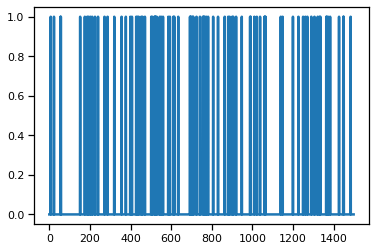

In [296]:
plt.plot(y_predict)

#**Final Analysis of Logistic Regression**

In [297]:
from sklearn import preprocessing
x_train_scaled = preprocessing.scale(x_train)
x_test_scaled = preprocessing.scale(x_test)

In [298]:
scaled_logreg_model = LogisticRegression()
scaled_logreg_model.fit(x_train_scaled, y_train)

# Predicting for test set
scaled_logreg_y_predicted = scaled_logreg_model.predict(x_test_scaled)
scaled_logreg_model_score = scaled_logreg_model.score(x_test_scaled, y_test)
scaled_logreg_accuracy =metrics.accuracy_score(y_test, scaled_logreg_y_predicted)

scaled_logreg_confusion_matrix = metrics.confusion_matrix(y_test, scaled_logreg_y_predicted)

In [299]:
print('----------------------Final Analysis of Logistic Regression----------------------------\n')
print('After Scalling Logistic Regression Model Accuracy Score: %f'  % scaled_logreg_accuracy)
print('\nAfter Scalling Logistic Regression Confusion Matrix: \n', scaled_logreg_confusion_matrix)
print('\nTrue Positive    = ', scaled_logreg_confusion_matrix[1][1])
print('True Negative     = ',   scaled_logreg_confusion_matrix[0][0])
print('False Positive     = ',   scaled_logreg_confusion_matrix[0][1])
print('False Negative    = ',   scaled_logreg_confusion_matrix[1][0])
print('\nK-NN classification Report : \n',metrics.classification_report(y_test, scaled_logreg_y_predicted))
conf_table = scaled_logreg_confusion_matrix
a = (conf_table[0,0] + conf_table[1,1]) / (conf_table[0,0] + conf_table[0,1] + conf_table[1,0] + conf_table[1,1])
p = conf_table[1,1] / (conf_table[1,1] + conf_table[0,1])
r = conf_table[1,1] / (conf_table[1,1] + conf_table[1,0])
f = (2 * p * r) / (p + r)
print("Accuracy of accepting Loan  : ",round(a,2))
print("precision of accepting Loan : ",round(p,2))
print("recall of accepting Loan    : ",round(r,2))
print("F1 score of accepting Loan  : ",round(f,2))

----------------------Final Analysis of Logistic Regression----------------------------

After Scalling Logistic Regression Model Accuracy Score: 0.950000

After Scalling Logistic Regression Confusion Matrix: 
 [[1352   20]
 [  55   73]]

True Positive    =  73
True Negative     =  1352
False Positive     =  20
False Negative    =  55

K-NN classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97      1372
           1       0.78      0.57      0.66       128

    accuracy                           0.95      1500
   macro avg       0.87      0.78      0.82      1500
weighted avg       0.95      0.95      0.95      1500

Accuracy of accepting Loan  :  0.95
precision of accepting Loan :  0.78
recall of accepting Loan    :  0.57
F1 score of accepting Loan  :  0.66


#**K-NN Analysis**

In [300]:
#x_train, x_test, y_train, y_test
x_train_scaled = preprocessing.scale(x_train)
x_test_scaled = preprocessing.scale(x_test)

!pip install sklearn

In [301]:
#Creating number list from range 1 to 20 of K for KNN
from sklearn.neighbors import KNeighborsClassifier
numberList = list(range(1,20))
neighbors = list(filter(lambda x: x % 2 != 0 , numberList)) #subsetting just the odd ones

#Declearing a empty list that will hold the accuracy scores
ac_scores = []
#performing accuracy metrics for value from 1,3,5....19
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    #predict the response
    knn.fit(x_train, y_train.ravel())               
    y_pred = knn.predict(x_test)
    #evaluate accuracy
    scores = metrics.accuracy_score(y_test, y_pred)
    #insert scores to the list
    ac_scores.append(scores)                

MSE = [1 - x for x in ac_scores] # changing to misclassification error


# determining best k
optimal_k = neighbors[MSE.index(min(MSE))]

In [302]:
scaled_knn_model = KNeighborsClassifier(n_neighbors=optimal_k , weights = 'uniform', metric='euclidean')
scaled_knn_model.fit(x_train_scaled, y_train)
scaled_knn_y_predict = scaled_knn_model.predict(x_test_scaled)
scaled_knn_score = scaled_knn_model.score(x_test_scaled, y_test)
scaled_knn_accuracy = metrics.accuracy_score(y_test, scaled_knn_y_predict)
scaled_knn_confusion_matrix = metrics.confusion_matrix(y_test, scaled_knn_y_predict)

In [303]:
print('----------------------Final Analysis of K-NN----------------------------\n')
print('After Scalling K-NN Model Accuracy Score: %f'  % scaled_knn_accuracy)
print('\nAfter Scalling K-NN Confusion Matrix: \n', scaled_knn_confusion_matrix)
print('\nTrue Positive    = ', scaled_knn_confusion_matrix[1][1])
print('True Negative     = ',   scaled_knn_confusion_matrix[0][0])
print('False Positive     = ',   scaled_knn_confusion_matrix[0][1])
print('False Negative    = ',   scaled_knn_confusion_matrix[1][0])
print('\nK-NN classification Report : \n',metrics.classification_report(y_test, scaled_knn_y_predict))
knn_conf_table = scaled_knn_confusion_matrix
a = (knn_conf_table[0,0] + knn_conf_table[1,1]) / (knn_conf_table[0,0] + knn_conf_table[0,1] + knn_conf_table[1,0] + knn_conf_table[1,1])
p = knn_conf_table[1,1] / (knn_conf_table[1,1] + knn_conf_table[0,1])
r = knn_conf_table[1,1] / (knn_conf_table[1,1] + knn_conf_table[1,0])
f = (2 * p * r) / (p + r)
print("\nAccuracy of accepting Loan  : ",round(a,2))
print("precision of accepting Loan : ",round(p,2))
print("recall of accepting Loan    : ",round(r,2))
print("F1 score of accepting Loan  : ",round(f,2))

----------------------Final Analysis of K-NN----------------------------

After Scalling K-NN Model Accuracy Score: 0.967333

After Scalling K-NN Confusion Matrix: 
 [[1361   11]
 [  38   90]]

True Positive    =  90
True Negative     =  1361
False Positive     =  11
False Negative    =  38

K-NN classification Report : 
               precision    recall  f1-score   support

           0       0.97      0.99      0.98      1372
           1       0.89      0.70      0.79       128

    accuracy                           0.97      1500
   macro avg       0.93      0.85      0.88      1500
weighted avg       0.97      0.97      0.97      1500


Accuracy of accepting Loan  :  0.97
precision of accepting Loan :  0.89
recall of accepting Loan    :  0.7
F1 score of accepting Loan  :  0.79


#**Naive Bayes**

In [304]:
#x_train, x_test, y_train, y_test
x_train_scaled = preprocessing.scale(x_train)
x_test_scaled = preprocessing.scale(x_test)

In [305]:
from sklearn.naive_bayes import GaussianNB
scaled_gnb_model = GaussianNB()
scaled_gnb_model.fit(x_train_scaled, y_train)
scaled_gnb_y_predict = scaled_gnb_model.predict(x_test_scaled)
scaled_gnb_score = scaled_gnb_model.score(x_test_scaled, y_test)
scaled_gnb_accuracy = metrics.accuracy_score(y_test, scaled_gnb_y_predict)
scaled_gnb_connfusion_matrix = metrics.confusion_matrix(y_test, scaled_gnb_y_predict)

In [306]:
print('----------------------Final Analysis of Naïve Bayes----------------------------\n')
print('After Scalling Naïve Bayes Model Accuracy Score: %f'  % scaled_gnb_accuracy)
print('\nAfter Scalling Naïve Bayes Confusion Matrix: \n', scaled_gnb_connfusion_matrix)
print('\nTrue Positive    = ', scaled_gnb_connfusion_matrix[1][1])
print('True Negative     = ',   scaled_gnb_connfusion_matrix[0][0])
print('False Positive     = ',   scaled_gnb_connfusion_matrix[0][1])
print('False Negative    = ',   scaled_gnb_connfusion_matrix[1][0])
print('\n Gaussian Naive Bayes classification Report : \n',metrics.classification_report(y_test, scaled_gnb_y_predict))
gnb_conf_table = scaled_gnb_connfusion_matrix
a = (gnb_conf_table[0,0] + gnb_conf_table[1,1]) / (gnb_conf_table[0,0] + gnb_conf_table[0,1] + gnb_conf_table[1,0] + knn_conf_table[1,1])
p = gnb_conf_table[1,1] / (gnb_conf_table[1,1] + gnb_conf_table[0,1])
r = gnb_conf_table[1,1] / (gnb_conf_table[1,1] + gnb_conf_table[1,0])
f = (2 * p * r) / (p + r)
print("\nAccuracy of accepting Loan   : ",round(a,2))
print("precision of accepting Loan  : ",round(p,2))
print("recall of accepting Loan     : ",round(r,2))
print("F1 score of accepting Loan   : ",round(f,2))

----------------------Final Analysis of Naïve Bayes----------------------------

After Scalling Naïve Bayes Model Accuracy Score: 0.899333

After Scalling Naïve Bayes Confusion Matrix: 
 [[1273   99]
 [  52   76]]

True Positive    =  76
True Negative     =  1273
False Positive     =  99
False Negative    =  52

 Gaussian Naive Bayes classification Report : 
               precision    recall  f1-score   support

           0       0.96      0.93      0.94      1372
           1       0.43      0.59      0.50       128

    accuracy                           0.90      1500
   macro avg       0.70      0.76      0.72      1500
weighted avg       0.92      0.90      0.91      1500


Accuracy of accepting Loan   :  0.89
precision of accepting Loan  :  0.43
recall of accepting Loan     :  0.59
F1 score of accepting Loan   :  0.5


#**DecisionTree Classifier**

In [307]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier(criterion = 'entropy',max_depth=3)
dt_model.fit(x_train, y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [308]:
dt_model.score(x_test , y_test)

0.9706666666666667

In [309]:
y_predict = dt_model.predict(x_test)
y_predict[:5]

array([0, 0, 0, 0, 0])

In [310]:
x_test.head(5)

,Age,Income,CCAvg,Education,Securities Account,Mortgage_Int
398,54,23,0.4,1,0,0
3833,33,83,0.1,1,0,0
4836,54,72,1.4,3,0,2
4572,32,81,1.8,3,0,0
636,40,120,6.1,1,0,1


#**Random Forest Classifier**

In [311]:
randomforest_model = RandomForestClassifier(max_depth=2, random_state=0)
randomforest_model.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=2, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

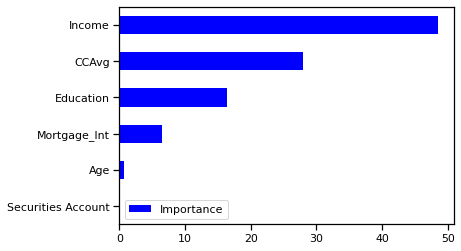

In [312]:
Importance = pd.DataFrame({'Importance':randomforest_model.feature_importances_*100}, index=x_train.columns)
Importance.sort_values('Importance', axis=0, ascending=True).plot(kind='barh', color='b', )

In [313]:
predicted_random=randomforest_model.predict(x_test)
randomforest_model.score(x_test,y_test)

0.936

#**COMAPRISION OF THREE MODELS**

Overall Model Accuracy After scaling:

Logistic Regression : 95%
K-Nearest Neighbors : 97%
Naive Bayes         : 90%

Overall Model Confusion matrix After scaling:


Logistic Regression: 
 [[1352   20]
 [  55   73]]

     True Positive    =  73
     True Negative     =  1352
     False Positive     =  20
     False Negative    =  55

K-Nearest Neighbors: 
 [[1361   11]
 [  38   90]]

    True Positive    =  90
    True Negative     =  1361
    False Positive     =  11
    False Negative    =  38

Naive Bayes: 
 [[1273   99]
 [  52   76]]

    True Positive    =  76
    True Negative     =  1273
    False Positive     =  99
    False Negative    =  52


Receiver Operating Characteristic (ROC) curve to evalute the classifier output quality.
If area of curve is closer to 1 which means better the model and if area of curve is closer to 0 which means poor the model.


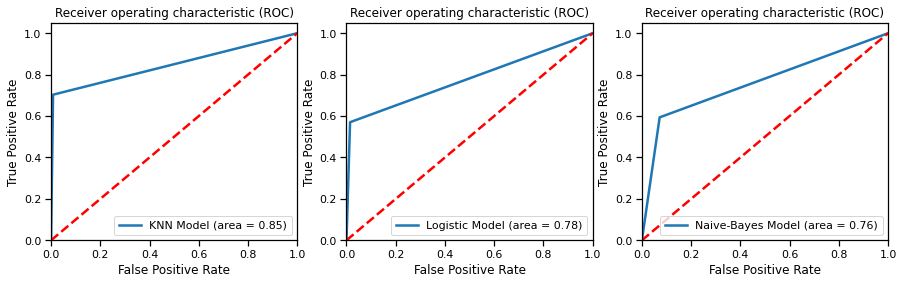

In [314]:
print('Overall Model Accuracy After scaling:\n')
print ('Logistic Regression : {0:.0f}%'. format(scaled_logreg_accuracy * 100))
print ('K-Nearest Neighbors : {0:.0f}%'. format(scaled_knn_accuracy * 100))
print ('Naive Bayes         : {0:.0f}%'. format(scaled_gnb_accuracy * 100))

print('\nOverall Model Confusion matrix After scaling:\n')
print('\nLogistic Regression: \n', scaled_logreg_confusion_matrix)
print('\n     True Positive    = ', scaled_logreg_confusion_matrix[1][1])
print('     True Negative     = ',   scaled_logreg_confusion_matrix[0][0])
print('     False Positive     = ',   scaled_logreg_confusion_matrix[0][1])
print('     False Negative    = ',   scaled_logreg_confusion_matrix[1][0])

print('\nK-Nearest Neighbors: \n', scaled_knn_confusion_matrix)
print('\n    True Positive    = ', scaled_knn_confusion_matrix[1][1])
print('    True Negative     = ',   scaled_knn_confusion_matrix[0][0])
print('    False Positive     = ',   scaled_knn_confusion_matrix[0][1])
print('    False Negative    = ',   scaled_knn_confusion_matrix[1][0])

print('\nNaive Bayes: \n', scaled_gnb_connfusion_matrix)
print('\n    True Positive    = ', scaled_gnb_connfusion_matrix[1][1])
print('    True Negative     = ',   scaled_gnb_connfusion_matrix[0][0])
print('    False Positive     = ',   scaled_gnb_connfusion_matrix[0][1])
print('    False Negative    = ',   scaled_gnb_connfusion_matrix[1][0])


print('\n\nReceiver Operating Characteristic (ROC) curve to evalute the classifier output quality.') 
print('If area of curve is closer to 1 which means better the model and if area of curve is closer to 0 which means poor the model.')

knn_fpr, knn_tpr, knn_threshold = metrics.roc_curve(y_test, scaled_knn_y_predict)
knn_roc_auc = metrics.roc_auc_score(y_test, scaled_knn_y_predict)
fig1_graph = plt.figure(figsize=(15,4))
fig1_graph.add_subplot(1,3,1)
plt.plot(knn_fpr, knn_tpr, label='KNN Model (area = %0.2f)' % knn_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")


logistic_fpr, logistic_tpr, logistic_threshold = metrics.roc_curve(y_test, scaled_logreg_y_predicted)
logistic_roc_auc = metrics.roc_auc_score(y_test, scaled_logreg_y_predicted)
fig1_graph.add_subplot(1,3,2)
plt.plot(logistic_fpr, logistic_tpr, label='Logistic Model (area = %0.2f)' % logistic_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")

nb_fpr, nb_tpr, nb_threshold = metrics.roc_curve(y_test, scaled_gnb_y_predict)
nb_roc_auc = metrics.roc_auc_score(y_test, scaled_gnb_y_predict)
fig1_graph.add_subplot(1,3,3)
plt.plot(nb_fpr, nb_tpr, label='Naive-Bayes Model (area = %0.2f)' % nb_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

#**CONCLUSION**

From the above, we can clearly see that k-Nearest Neighbors Alogorithm with scaled data gives us best accuracy of 97%.

Also the Type I(False Posssitive) and Type II(False Negative) errors are least in K-Nearest model. (i.e. 11 and 38 respectively)

The area in ROC curve for K-NN is 0.85 which is close to 1 which stats that K-NN is the best model in comparesion of Logistic Model and Naive-Bayes Model whose ROC area is 0.78 and 0.76 repectively.

Even in Decision tree classifier the accuracy hits 97% and in random forest classifier accuracy hits 93%

Decision Tree classifier can be the choice to predict the customers who will accept the personal loan

Hence among the above algorithm applied on the underline dataset, K-NN would be the best choice to predict the customers who will accept the personal loan.